In [2]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy import sparse


In [3]:
N = 150
X, Y = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))
X

array([[0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       ...,
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ]])

In [4]:
def get_potential(x,y):
    return 0*x

def get_potential(x,y):
    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))

V = get_potential(X,Y)

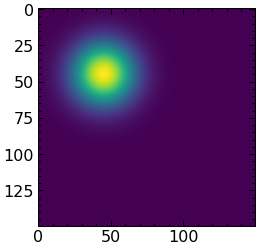

In [5]:
plt.imshow(get_potential(X,Y))

In [6]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1, 0, 1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [7]:
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')

In [8]:
def get_e(n):
    return eigenvectors.T[n].reshape((N, N))

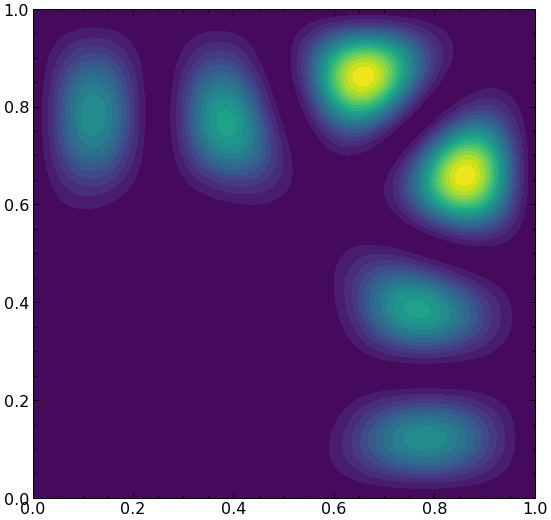

In [9]:
plt.figure(figsize=(9, 9))
plt.contourf(X, Y, get_e(6)**2, 20)

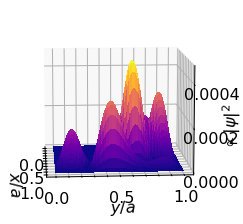

In [16]:

my_cmap = plt.get_cmap('plasma')

def init():
    
    ax.plot_surface(X, Y, get_e(5)**2, cmap=my_cmap, 
                    linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    ax.set_zlabel('$\propto|\psi|^2$')
    return fig,

def animate(i):
    ax.view_init(elev=10, azim=4*i)
    return fig,

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ani = animation.FuncAnimation(fig, animate, init_func=init, 
                              frames = 90, interval=50)
ani.save('rotate_azimuth_angle_3d_surf.gif', writer='pillow', fps=20)



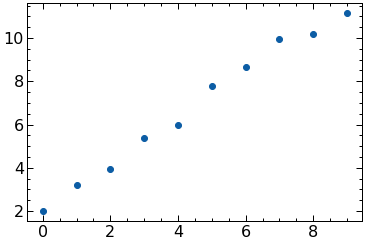

In [12]:
alpha = eigenvalues[0]/2
E_div_alpha = eigenvalues/alpha
_ = np.arange(0, len(eigenvalues), 1)
plt.scatter(_, E_div_alpha)
#[plt.axhline(nx**2 + ny**2, color = 'r') for nx in range(1,5) for ny in range (1,5)]